In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/VCB-Historical-Data_Group 9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,47765.0,46844.0,47765.0,46690.0,910430,0.0281
2019-03-04,48226.0,47765.0,48379.0,47765.0,1720000,0.0097
2019-03-05,48379.0,48226.0,48994.0,47995.0,2009999,0.0032
2019-03-06,48149.0,48456.0,48610.0,47535.0,1380000,-0.0048
2019-03-07,48456.0,48149.0,48994.0,48072.0,2420000,0.0064
...,...,...,...,...,...,...
2024-05-27,90200.0,90400.0,90600.0,89700.0,1060000,0.0000
2024-05-28,90700.0,89800.0,90700.0,89800.0,1350000,0.0055
2024-05-29,89800.0,90800.0,91000.0,89800.0,1190000,-0.0099


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=18533.999, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=18266.932, Time=1.51 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18535.888, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18160.300, Time=5.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.93 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=18160.219, Time=5.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=18265.051, Time=0.95 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=18160.301, Time=5.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=11.70 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=18

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -9077.109
Date:                            Thu, 06 Jun 2024   AIC                          18160.219
Time:                                    16:08:57   BIC                          18175.051
Sample:                                         0   HQIC                         18165.846
                                           - 1050                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5804      0.007    -80.822      0.000      -0.594      -0.566
ar.S.L24      -0.2687      0.007    -40.018      0.000      -0.282      -0.256
sigma2      2.131e+06    4.7e+04     45.329      0.000    2.04e+06    2.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):              2486.65
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.82
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1050    78799.818247
1051    79194.362047
1052    79708.208405
1053    79323.377943
1054    79982.339047
1055    79427.204802
1056    80055.867610
1057    81284.157954
1058    80633.796021
1059    80977.485311
1060    80387.460472
1061    80838.835979
1062    80832.893207
1063    80831.063831
1064    81109.514277
1065    80924.137905
1066    81355.320822
1067    80571.615476
1068    81224.217028
1069    82584.177704
1070    82035.365994
1071    82214.106654
1072    81657.143236
1073    82139.553587
1074    82297.331021
1075    82510.619365
1076    83038.060131
1077    82976.861504
1078    83476.829551
1079    82519.726691
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
1050    78799.818247
1051    79194.362047
1052    79708.208405
1053    79323.377943
1054    79982.339047
1055    79427.204802
1056    80055.867610
1057    81284.157954
1058    80633.796021
1059    80977.485311
1060    80387.460472
1061    80838.835979
1062    80832.893207
1063    80831.063831
1064    81109.514277
1065    80924.137905
1066    81355.320822
1067    80571.615476
1068    81224.217028
1069    82584.177704
1070    82035.365994
1071    82214.106654
1072    81657.143236
1073    82139.553587
1074    82297.331021
1075    82510.619365
1076    83038.060131
1077    82976.861504
1078    83476.829551
1079    82519.726691
1080    83285.368767
1081    84967.099996
1082    84374.766475
1083    84488.618356
1084    83843.408546
1085    84596.059740
1086    84720.294652
1087    84915.254132
1088    85361.446929
1089    85174.578420
1090    85695.837587
1091    84900.795224
1092    85594.398423
1093    87053.998143
1094    86459.633326
1095    

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
1050    78799.818247
1051    79194.362047
1052    79708.208405
1053    79323.377943
1054    79982.339047
            ...     
1135    93076.324157
1136    93521.228567
1137    93374.735075
1138    93874.569956
1139    93029.614177
Length: 90, dtype: float64


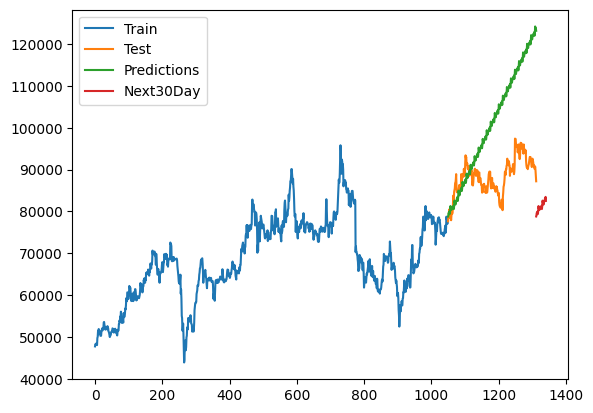

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

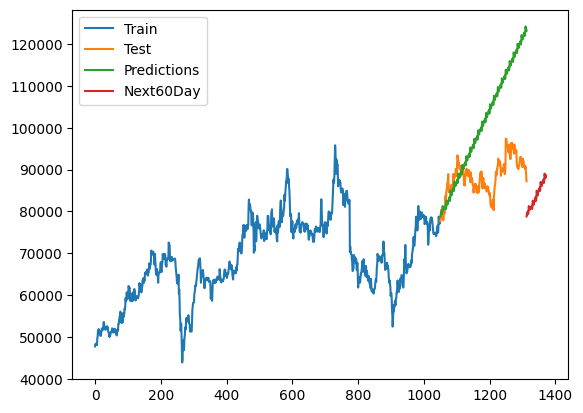

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

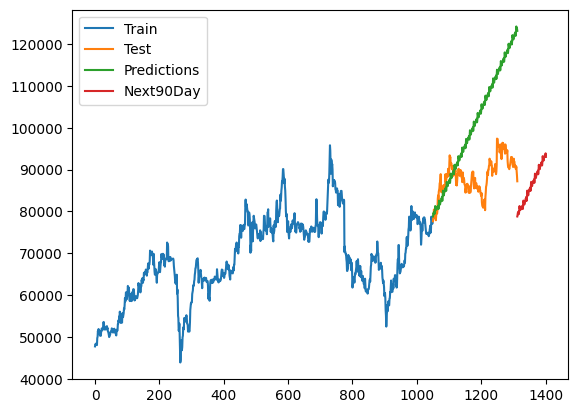

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 16889.099264509263
Testing MAPE: 15.380807030830152
Testing MAE: 13728.850081995268
